## Decision Tree Classification

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
x = df.drop('target', axis=1)
y = df['target']

## splitting the data

In [5]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

## Train Model

In [6]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

## Evaluation of Model

In [7]:
## Testing Data
y_pred = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_test,y_pred)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_test,y_pred)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[18  5]
 [ 9 29]]

Accuracy Score :
 0.7704918032786885

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       0.85      0.76      0.81        38

    accuracy                           0.77        61
   macro avg       0.76      0.77      0.76        61
weighted avg       0.78      0.77      0.77        61



In [8]:
## Training Data
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[115   0]
 [  0 127]]

Accuracy Score :
 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       127

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



## Plot Decision Tree

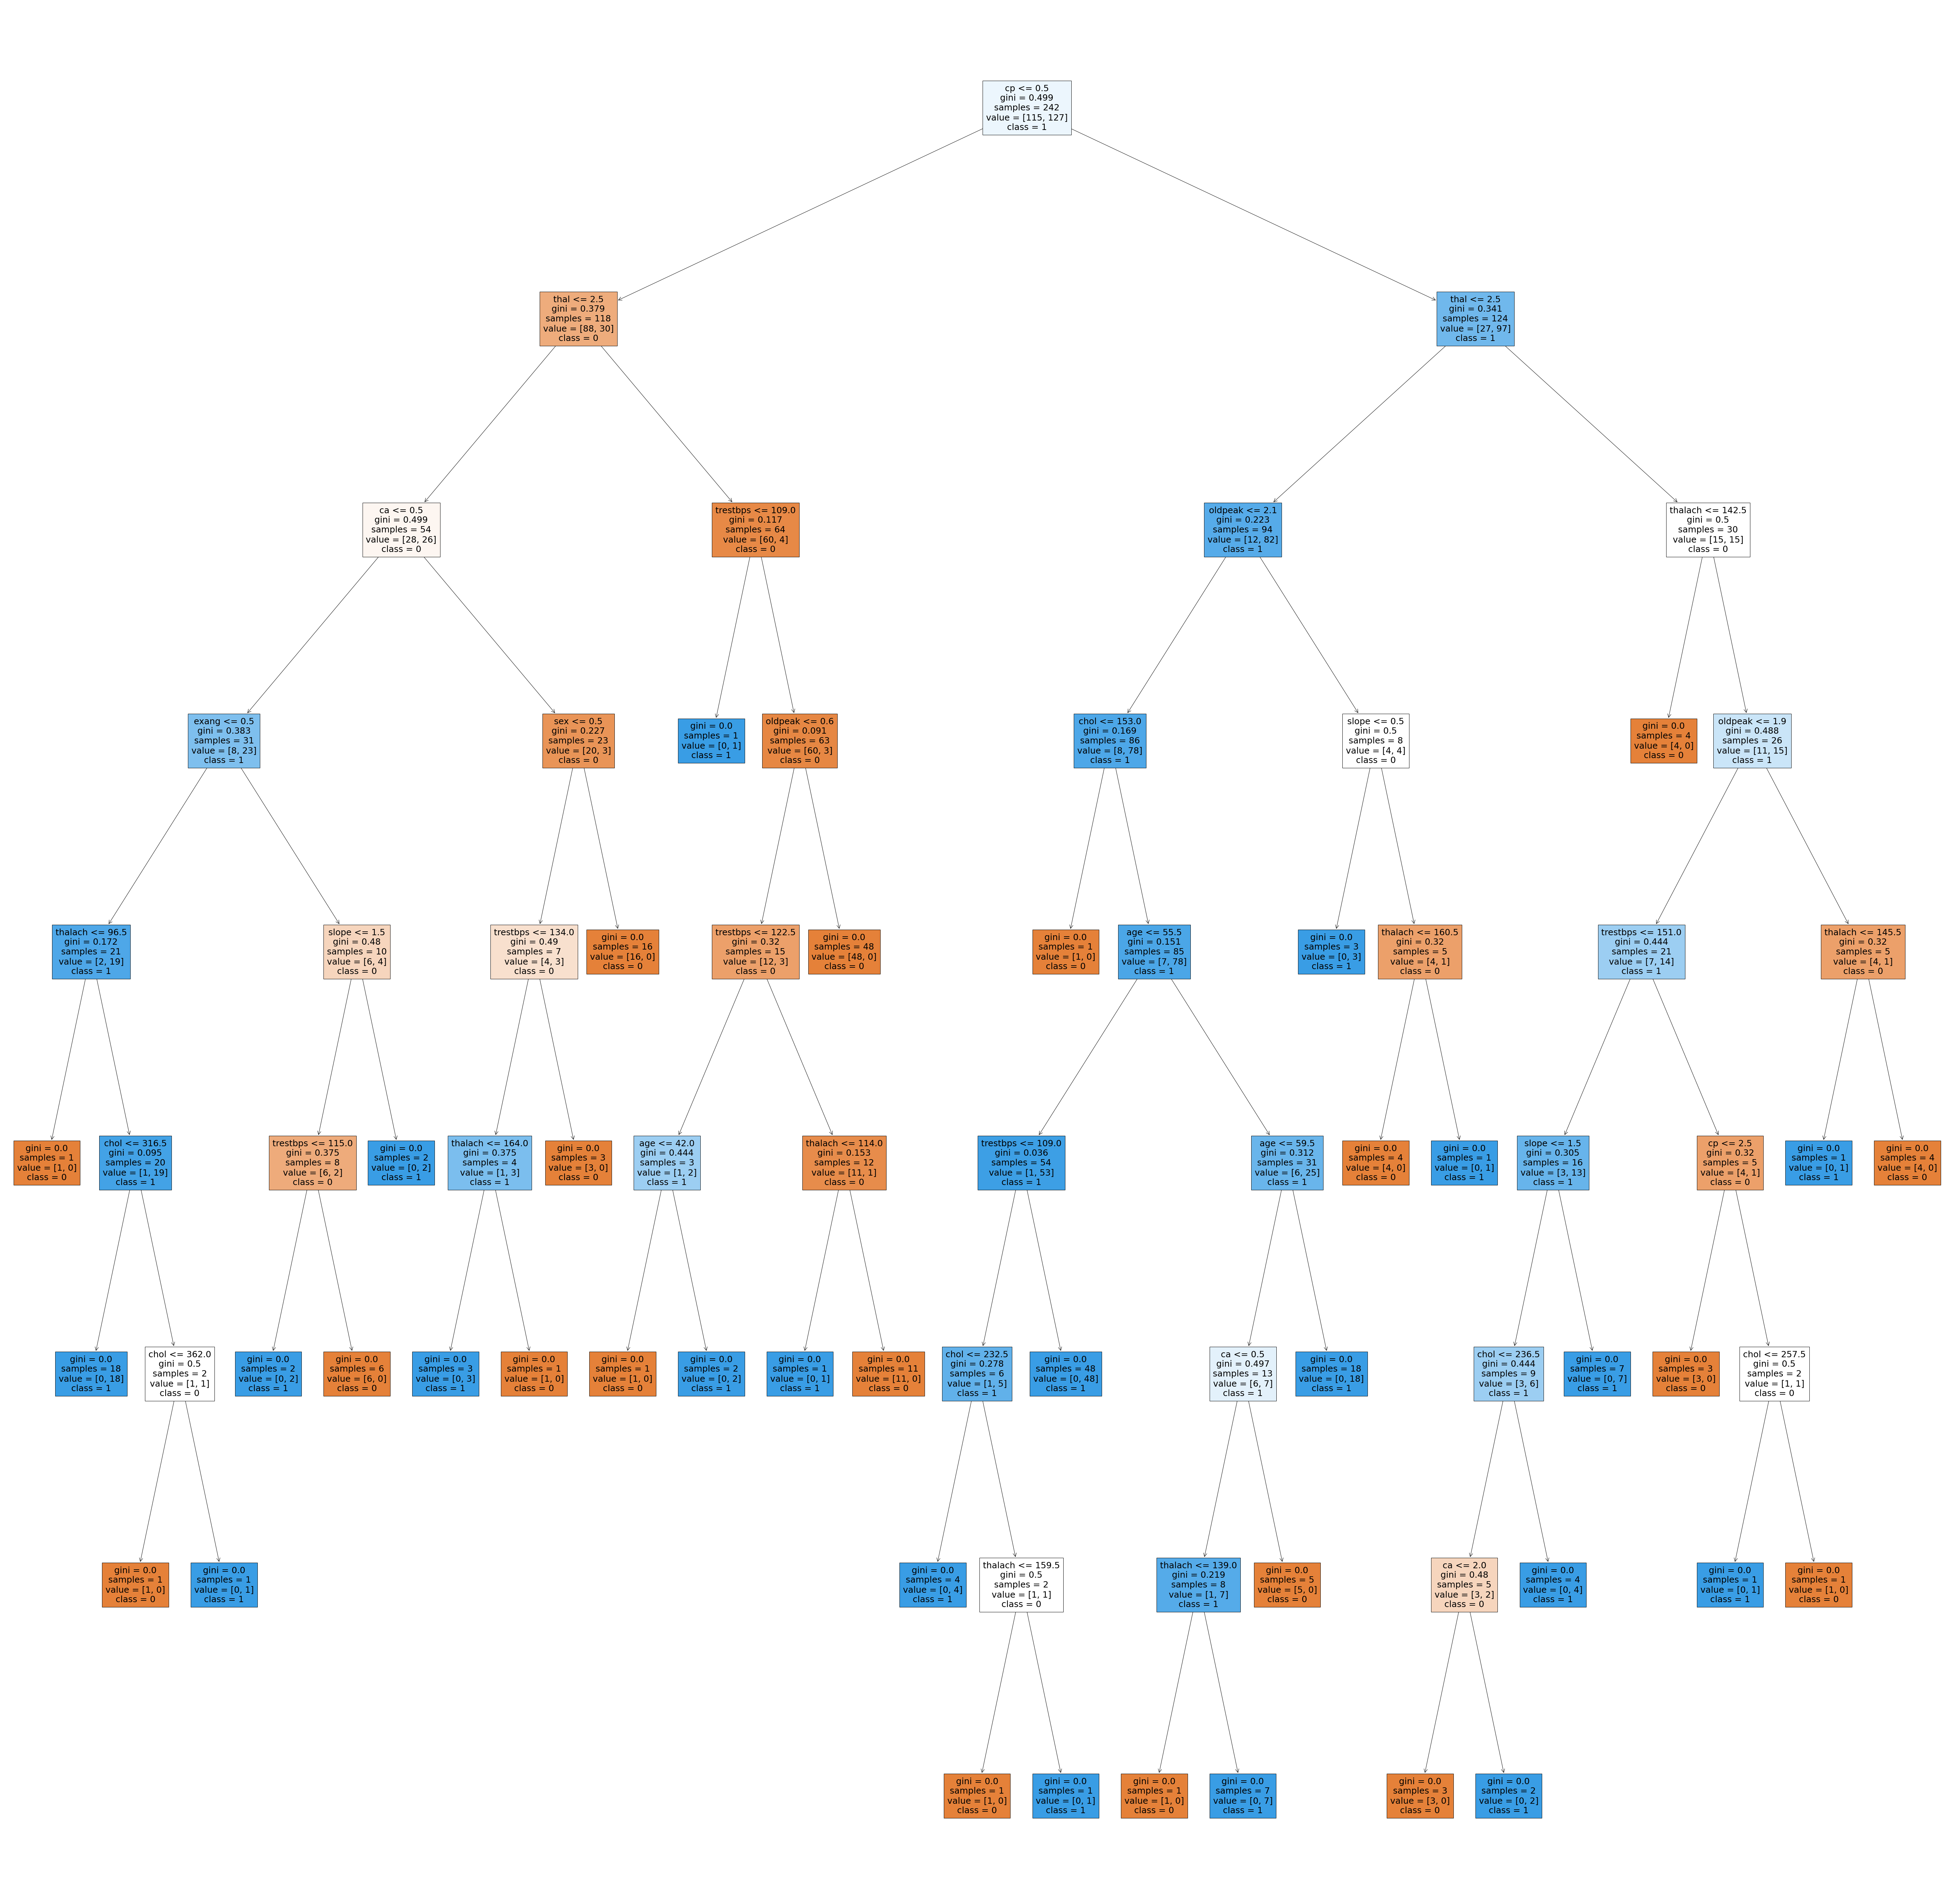

In [9]:
plt.figure(figsize=(100,100))
tree = plot_tree(dt_model, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('Decision_Tree_clf.png')

## Hyperparameter Tunning

In [12]:
dt_model = DecisionTreeClassifier()

hyp= {'criterion' : ['gini','entropy'],
'max_depth': np.arange(1,15),
'min_samples_leaf':np.arange(2,10), 
'min_samples_split':np.arange(2,20)}

gscv_dt_model = GridSearchCV(dt_model, hyp, cv=7)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [13]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=9,
                       min_samples_split=3)

In [14]:
## Testing Data after hyper parameter tunning
dt_model= gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

Cnf_matrix = confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_test,y_pred)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_test,y_pred)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[17  6]
 [ 7 31]]

Accuracy Score :
 0.7868852459016393

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.84      0.82      0.83        38

    accuracy                           0.79        61
   macro avg       0.77      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [15]:
## Training Data after hyper parameter tunning
y_pred_train = dt_model.predict(x_train)

Cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('\nConfusion Matrix is :\n', Cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train)
print('\nAccuracy Score :\n', acc_score)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report:\n', clf_report)


Confusion Matrix is :
 [[ 93  22]
 [ 15 112]]

Accuracy Score :
 0.8471074380165289

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       115
           1       0.84      0.88      0.86       127

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



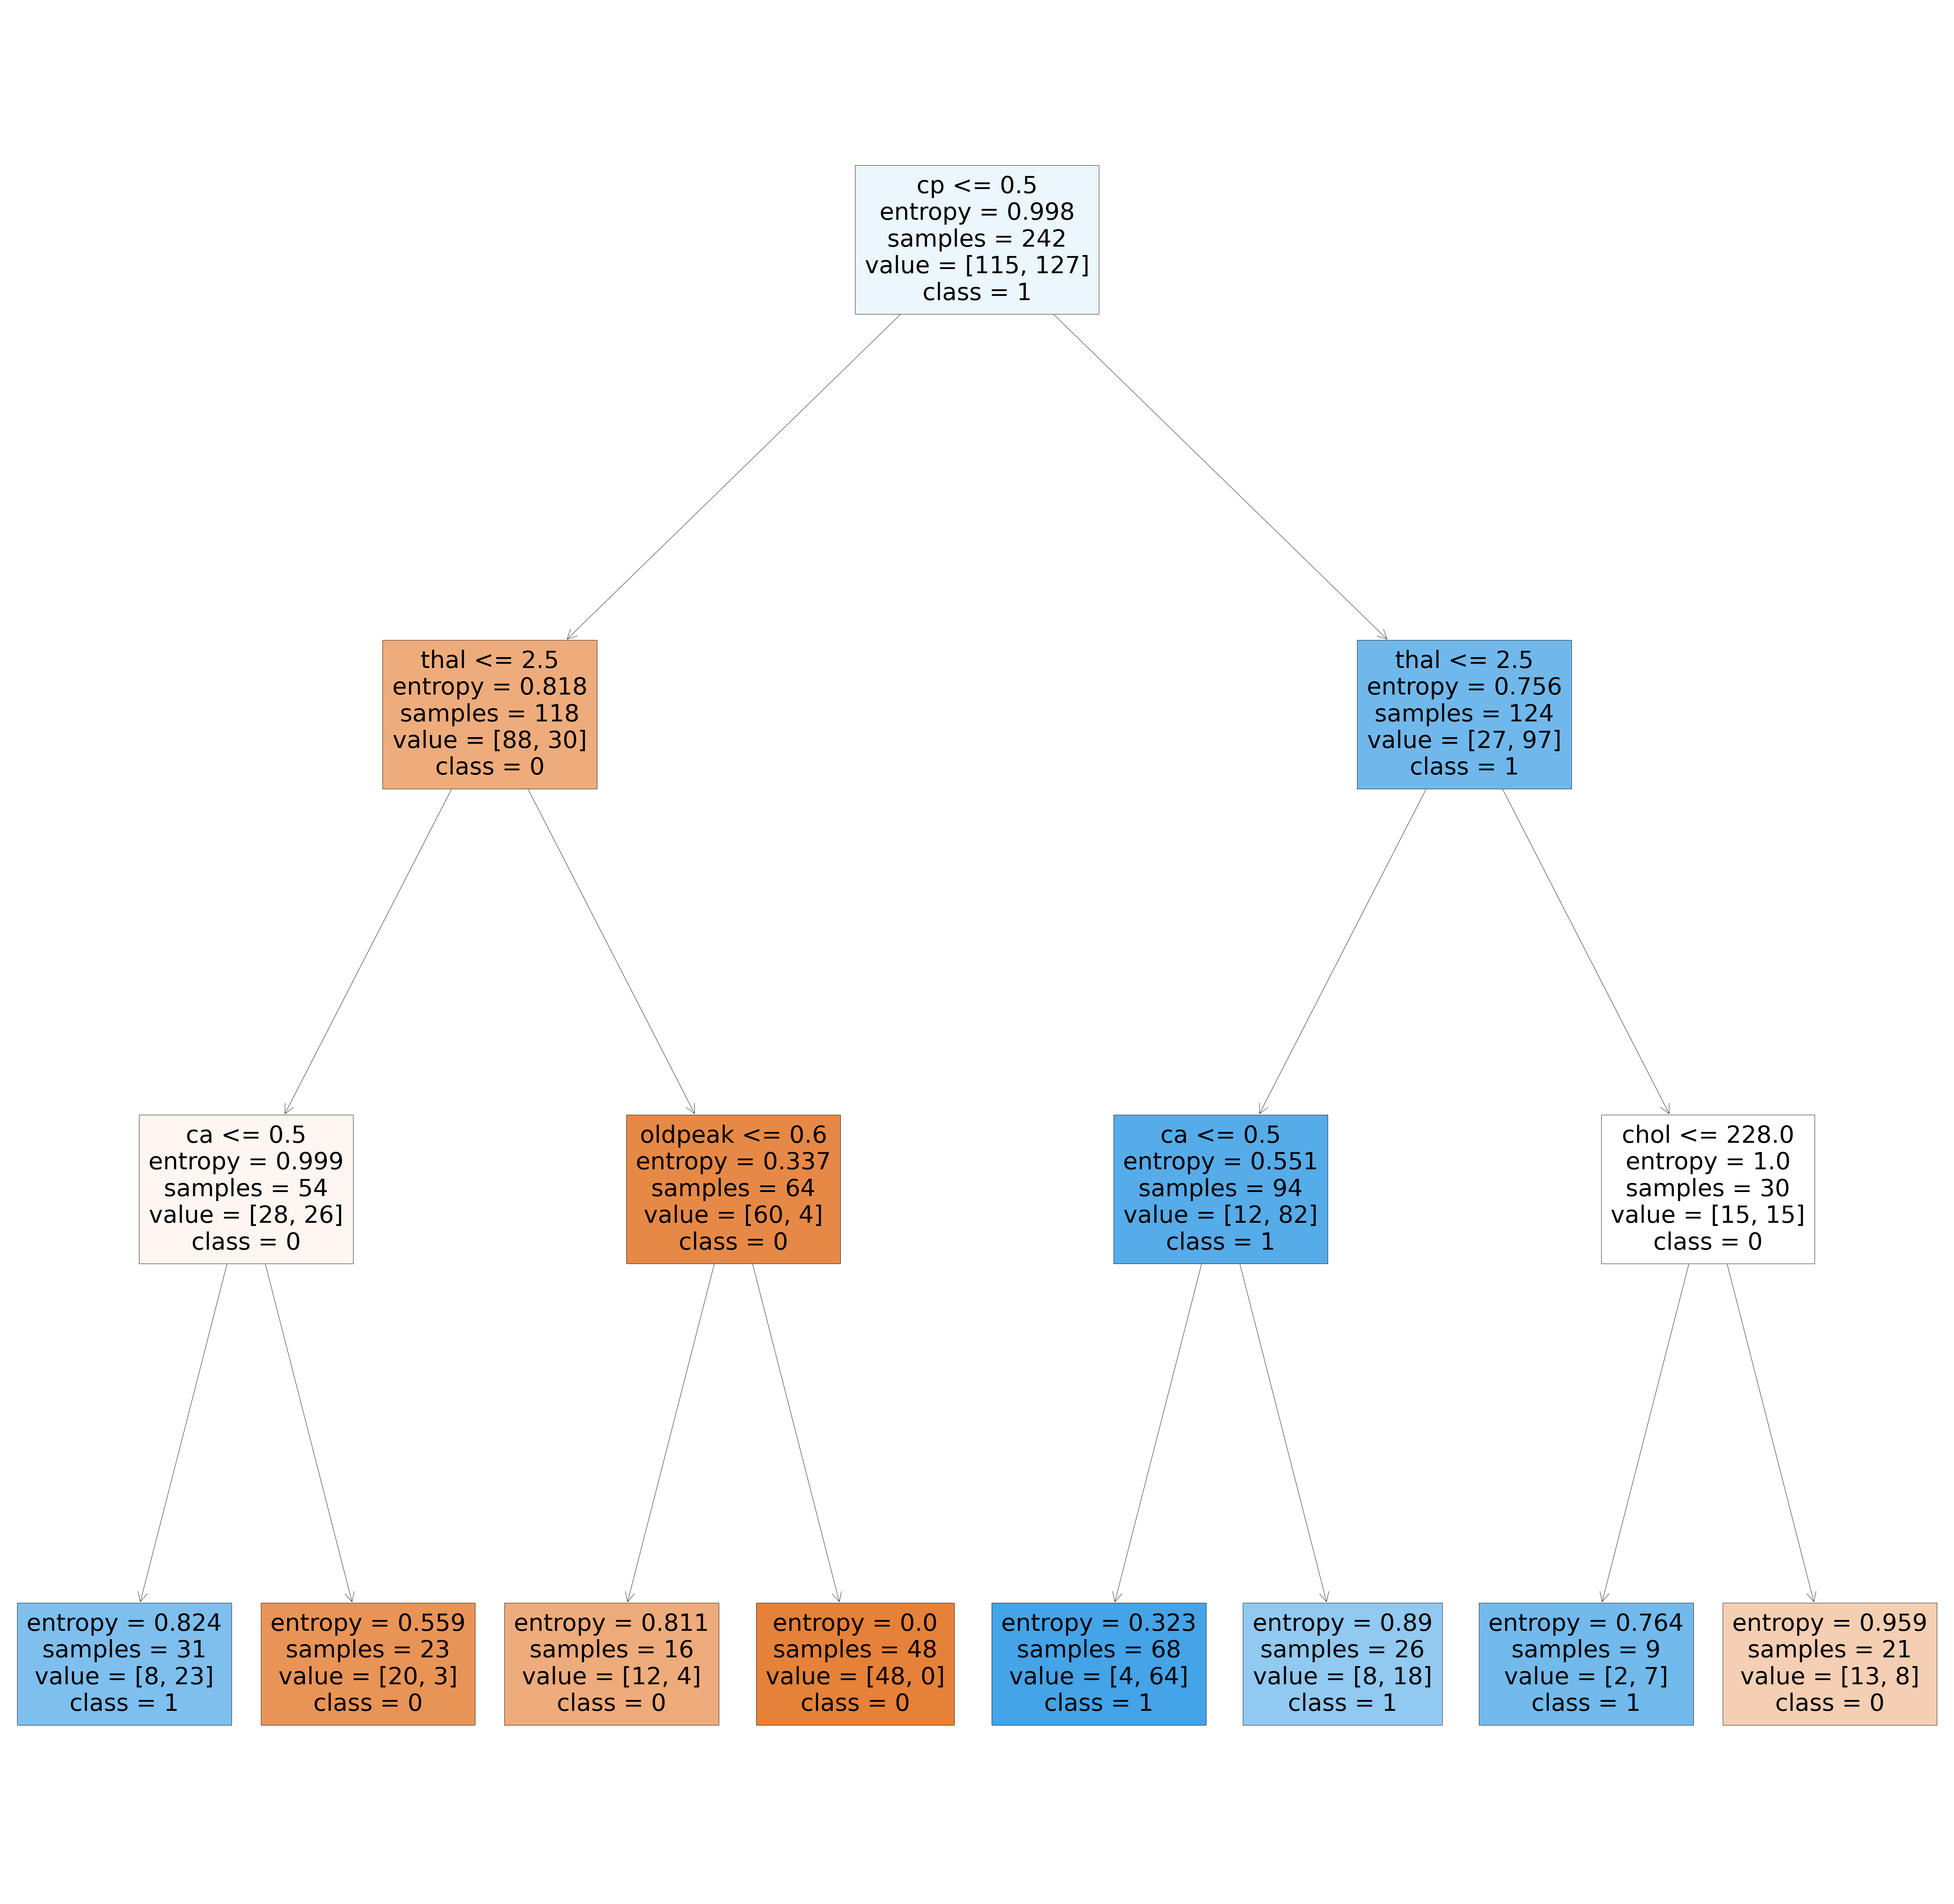

In [16]:
plt.figure(figsize=(100,100))
tree = plot_tree(dt_model, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('Decision_Tree_clf_hyp.png')